In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')
df = df.dropna()

In [ ]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2025 - df['Year_Birth']
df['Spending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [ ]:
features = [
    'Income', 'Recency', 'Age', 'TotalChildren', 'Spending',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

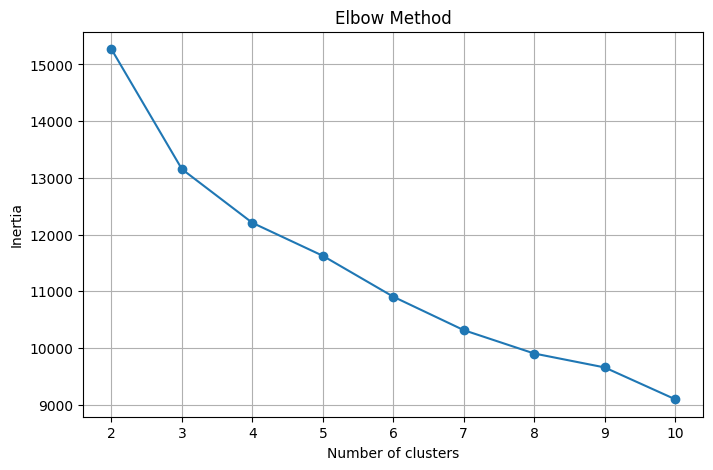

In [ ]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("visuals/elbow_method.png")

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df['PCA1'] = pca_components[:,0]
df['PCA2'] = pca_components[:,1]

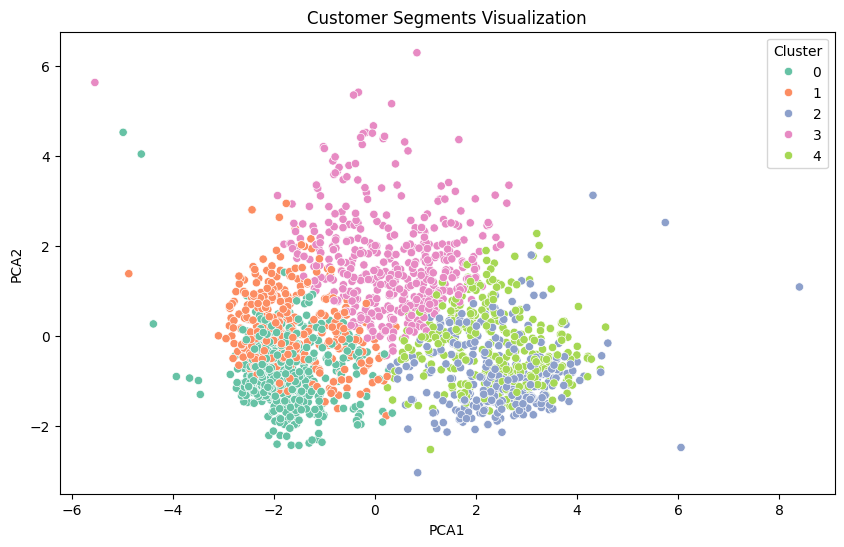

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Customer Segments Visualization")
plt.savefig("visuals/cluster_visualization.png")

In [ ]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-0.87568792 -0.025771   -0.66171187 -0.19612262 -0.84770653 -0.30098303
  -0.71258477 -0.73832418 -0.82104036  0.60683653]
 [-0.42296758  0.04804909  0.4795024   1.20971198 -0.82655434  0.01235565
  -0.71077492 -0.68261081 -0.72555851  0.22411128]
 [ 1.04497186 -0.00342256 -0.86368071 -0.95982633  1.24726563 -0.57263261
   0.3135224   1.04170563  0.85039338 -1.05184468]
 [ 0.16423702 -0.02857184  0.19926346  0.4165903   0.2233826   1.10085826
   0.98096874  0.06360537  0.54034535  0.4407402 ]
 [ 0.82168893  0.02829319  1.05191403 -0.80740617  0.99162696 -0.48421967
   0.43661823  1.03667639  0.75310382 -0.94498861]]


In [ ]:
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("\nCluster-wise Feature Averages:")
print(cluster_summary)


Cluster-wise Feature Averages:
           Income  Recency    Age  TotalChildren  Spending  NumDealsPurchases  \
Cluster                                                                         
0        30208.47    48.27  48.25           0.80     96.11               1.74   
1        41592.01    50.29  61.93           1.86    108.36               2.34   
2        78546.47    48.91  45.83           0.23   1358.88               1.22   
3        56359.51    48.29  58.57           1.26    740.87               4.44   
4        72927.02    49.83  68.78           0.34   1204.79               1.39   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0                   2.13                 0.51               3.13   
1                   2.14                 0.67               3.43   
2                   4.94                 5.72               8.56   
3                   6.77                 2.86               